## Data Exploration

In this file we preliminarily explore some of the data by generating graphs that are not used in the final report.

## Setup

We start by importing libraries and retrieving SIPP data

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
sipp = pd.read_csv(r"C:\Users\shell\Python stuff\SIPP data\SIPP_2014_2021.txt")

C:\Users\shell\AppData\Local\Temp\ipykernel_16588\2120217739.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  sipp = pd.read_csv(r"C:\Users\shell\Python stuff\SIPP data\SIPP_2014_2021.txt")


We then sort the data to remove duplicate months and people without debt

In [3]:
sipp = sipp[(sipp['MONTHCODE'] == 1) & (sipp['EEDUC'] == 43)]
in_debt_persons = sipp[(sipp['TOEDDEBTVAL'] > 0)]

In [4]:
display(in_debt_persons)

,Unnamed: 0,SSUID,PNUM,ESEX,ERACE,EEDUC,EOEDDEBT,MONTHCODE,ERESIDENCEID,TJB1_ANNSAL1,TJB1_ANNSAL2,TJB1_ANNSAL3,TOEDDEBTVAL,TOEDDT_MED,TOEDDT_STD,TAGE,YEAR
658,658,41810155322,101,1,4,43.0,1.0,1,100001,75000.0,100000.0,NaN,10000.0,NaN,NaN,36,2021
973,973,41817288721,102,1,1,43.0,1.0,1,100001,78700.0,79200.0,NaN,35000.0,NaN,NaN,46,2021
1033,1033,41819936022,101,2,4,43.0,1.0,1,100001,NaN,NaN,NaN,60000.0,NaN,NaN,37,2021
1357,1357,41821590320,101,2,1,43.0,1.0,1,200001,NaN,NaN,NaN,37000.0,NaN,NaN,24,2021
1525,1525,41828599420,103,1,1,43.0,1.0,1,100001,24600.0,25100.0,NaN,50000.0,NaN,NaN,34,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861916,674654,881995408069,102,2,1,43.0,1.0,1,100001,55000.0,NaN,NaN,6500.0,NaN,NaN,27,2014
4862168,674906,881995610972,101,1,1,43.0,1.0,1,100001,48000.0,54000.0,NaN,5000.0,NaN,NaN,27,2014
4862588,675326,881995860486,103,1,1,43.0,1.0,1,100001,NaN,NaN,NaN,19700.0,NaN,NaN,24,2014
4863076,675814,881995967502,101,2,1,43.0,1.0,1,100001,NaN,NaN,NaN,100000.0,NaN,NaN,45,2014


Next we create a new dataframe with only the age and median debt per age by defining a function to find the median and return a new dataframe

In [5]:
def median_debt(age, df):
    '''
    Finds the median debt of one age in the given data frame
    '''
    dataframe = df
    dataframe = dataframe[dataframe['TAGE'] == age]
    if dataframe['TOEDDEBTVAL'].median() > 0:
        return dataframe['TOEDDEBTVAL'].median()
    else:
        return 0

In [6]:
debt_df = pd.DataFrame()
debt_df['age'] = range(90)
list = []
for x in debt_df['age']:
    list.append(median_debt(x, in_debt_persons))

debt_df['median_debt'] = list
display(debt_df)

,age,median_debt
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
85,85,8000.0
86,86,0.0
87,87,0.0
88,88,0.0


Now we clean the dataframe to get rid of statistically insignifcant ages (ones with less than 10 rows of data)

In [7]:
no_data_ages = []
for x in range(90):
    if len(in_debt_persons[(in_debt_persons['TAGE'] == x)].index) < 10:
        no_data_ages.append(x)
debt_df.drop(index=no_data_ages, axis='index', inplace=True)

<Axes: xlabel='age', ylabel='median_debt'>

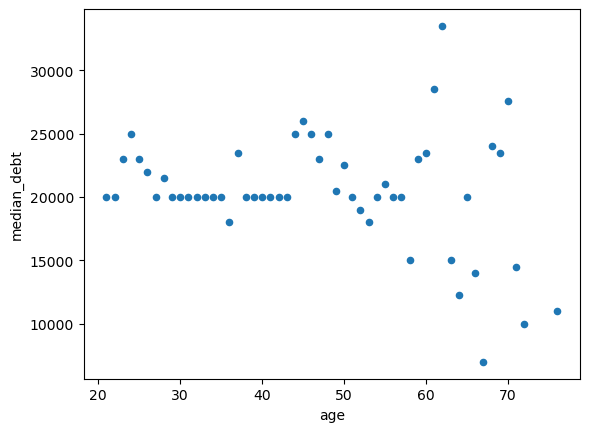

In [8]:
debt_df.plot.scatter(x='age', y='median_debt')

Now that we have the median data, we can use Numpy's polyplot to find the trinomial (3rd power polynomial) regression of the data

In [9]:
coefficients = np.polyfit(x=debt_df['age'], y=debt_df['median_debt'], deg=3)
function = np.poly1d(coefficients)
print(function)

         3         2
-0.3166 x + 39.99 x - 1593 x + 4.1e+04


Now that we have the scatter plot and function for it's regression, we can graph the trends in median debt

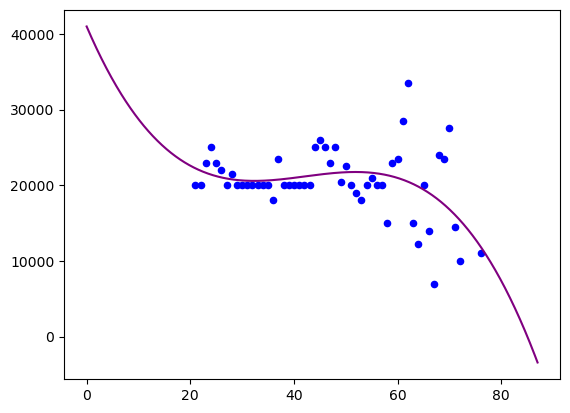

In [10]:
x=np.linspace(0, 87, 1000)
y=function(x)

plt.plot(x, y, c='purple')
plt.scatter(x=debt_df['age'], y=debt_df['median_debt'],color='blue',s=20)
plt.show()

The above graph's range goes completely out of the domain for the data on average student debt, so we will abstract all of the above into a function so we can fix this mistake and repeat the graphing process for the data from 2014-2019.

First, we define a function to clean and sort the data.

In [11]:
def clean_sort(dataframe):
    df = dataframe
    df = df[(df['MONTHCODE'] == 1) & (df['TOEDDEBTVAL'] > 0) & (df['EEDUC'] == 43)]
    
    debt_df = pd.DataFrame()
    debt_df['age'] = range(90)
    median_age_debt_list = []
    for x in debt_df['age']:
        median_age_debt_list.append(median_debt(x, dataframe))

    debt_df['median_debt'] = median_age_debt_list
    
    no_data_ages = []
    for x in range(90):
        if len(df[(df['TAGE'] == x)].index) < 10:
            no_data_ages.append(x)
    debt_df.drop(index=no_data_ages, axis='index', inplace=True)
    return debt_df

And finally a function to graph the data and it's trinomial regression.

In [12]:
def graph_regression(dataframe, year):
    dataframe = clean_sort(dataframe)
    coefficients = np.polyfit(x=dataframe['age'], y=dataframe['median_debt'], deg=3)
    function = np.poly1d(coefficients)
    
    x=np.linspace(0, 87, 1000)
    y=function(x)
    
    plt.ylim(0, 75000)
    plt.xlabel('age')
    plt.ylabel('median current student loan debt ($)')
    plt.title('Median current student loan debt by age')
    
    color = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(x, y, color=color)
    plt.scatter(x=dataframe['age'], y=dataframe['median_debt'],s=20,label=year, color=color)
    
    plt.legend()
    plt.show

let's try running the code on the data from 2021

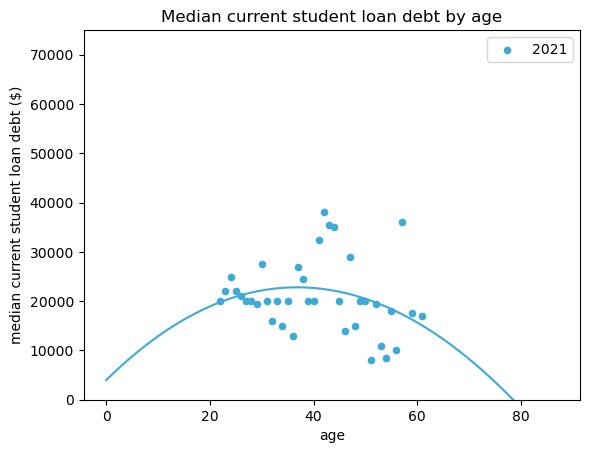

In [13]:
graph_regression(sipp[sipp['YEAR'] == 2021], 2021)

Now we can make graphs for every year of SIPP data from 2014-2021!

We can output a single graph (like above), or compare multiple years at once (like below).

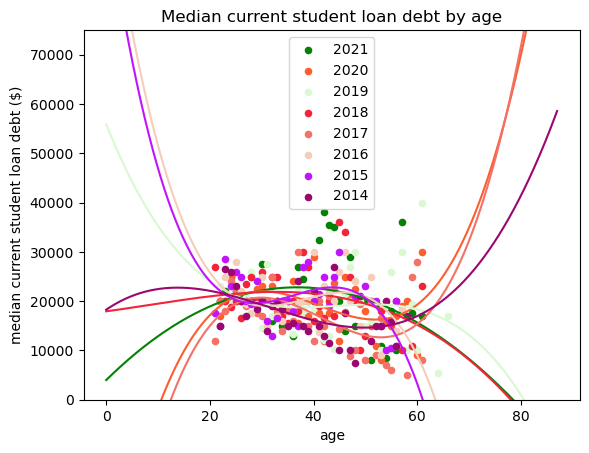

In [14]:
graph_regression(sipp[sipp['YEAR'] == 2021], 2021)
graph_regression(sipp[sipp['YEAR'] == 2020], 2020)
graph_regression(sipp[sipp['YEAR'] == 2019], 2019)
graph_regression(sipp[sipp['YEAR'] == 2018], 2018)
graph_regression(sipp[sipp['YEAR'] == 2017], 2017)
graph_regression(sipp[sipp['YEAR'] == 2016], 2016)
graph_regression(sipp[sipp['YEAR'] == 2015], 2015)
graph_regression(sipp[sipp['YEAR'] == 2014], 2014)

Even though there's a lot of data included here, this graph is a huge mess. In later notebooks, we'll use more consistent color palettes and different graphing methods to better describe our data.